# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

El análisis cluster engloba distintos métodos, en nuestro ejemplo nos centraremos en el método K-means. El método **K-means** agrupa los elementos o variables analizadas en un número de clusters ya predeterminado. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **VarCovid**, elaborado a partir de los datos publicados por el INE. 

## **K-means**

Cargamos las librerias que vamos a utilizar en el modelo.

In [1]:
# Preparación de los datos 
import numpy as np
import pandas as pd
# Modelado 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **VarCovid** 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VarCovid.xlsx to VarCovid.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [3]:
datos=pd.read_excel('VarCovid.xlsx')
datos.head()

,ccaa,2020SM20,2020SM53,1Ola,2Ola,3Ola
0,Total nacional,26.02,19.98,76.975364,18.564191,25.327608
1,Andalucía,4.49,12.76,16.674314,21.894934,27.770142
2,Aragón,22.26,23.98,57.469077,41.535777,21.928328
3,"Asturias, Principado de",9.84,14.74,25.629173,22.050772,20.941040
4,"Balears, Illes",1.88,9.06,16.572808,15.243648,23.073147


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos la tasa de variación del exceso de mortalidad de la primera ola y segunda ola. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas.

In [4]:
columnas = ["1Ola", "2Ola"]
resultado = datos[columnas]
comunidades = datos["ccaa"]


Vamos a escalar el modelo, ya que hay grandes diferencias entre las tasas de la primera y segunda ola, así tendremos nuestros datos dentro de un rango dado, como posteriormente veremos gráficamente. Además, creamos los **cluster**, en nuestro caso vamos a escoger 4 cluster. En este caso utilizamos fit() para ajustar el modelo a los datos que hemos cargado y el método predict() para realizar predicciones. 

In [5]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
grupos = modelo.predict(resultado_escalado)

Una vez creados los cluster, los relacionamos con nuestra variable comunidades que contiene las Comunidades Autonomas. 

In [6]:
clusters=pd.concat([comunidades,pd.DataFrame(grupos)],axis=1)
clusters.rename(columns={"ccaa":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters

,Comunidades Autónomas,Cluster
0,Total nacional,0
1,Andalucía,0
2,Aragón,2
3,"Asturias, Principado de",0
4,"Balears, Illes",3
5,Canarias,3
6,Cantabria,3
7,Castilla y León,0
8,Castilla - La Mancha,1
9,Cataluña,0


Para comprobar cuál es el número de cluster adecuado para desarrollar nuestro modelo, utilizamos el **método Elbow**, el cual nos dirá el valor a partir del cual añadir más clusters apenas consigue mejoría en el modelo. En este caso vemos como el número adecuado de cluster es 4. 

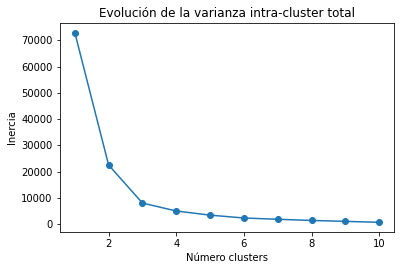

In [7]:
range_clusters = range(1, 11)
inercia = []

for i in range_clusters:
    modelo = KMeans(
                        n_clusters   = i, 
                        n_init       = 20, 
                        random_state = 50
                     )
    modelo.fit(resultado)
    inercia.append(modelo.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_clusters, inercia, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Inercia');

Para poder generar el modelo, tenemos que correr de nuevo las variables generadas.

In [8]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
grupos = modelo.predict(resultado_escalado)

Vamos a visualizar nuestro modelo, para ello, definimos la función que vamos a llevar a cabo, en este caso situación. En nuestro gráfico de dispersión tendremos dos parametros, x e y, que serán los datos escogidos, c que es el color que le vamos a dar a los datos y s el tamaño de la forma en la que se presenta el dato (marker). 

Además, introducimos unos centroides que se situaran en el centro de cada cluster. 

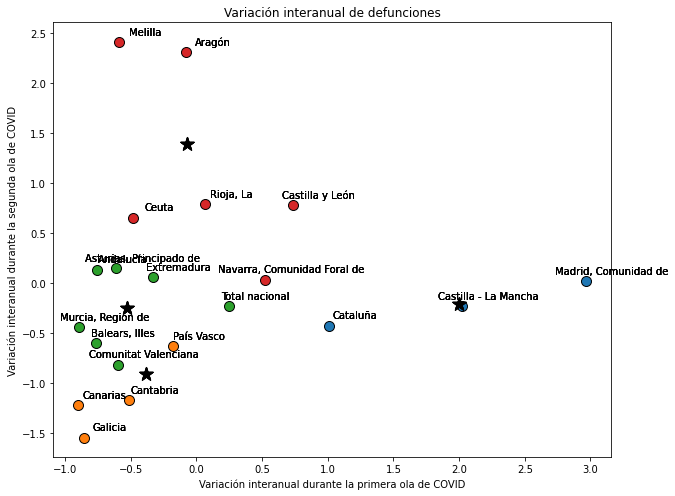

In [25]:
def situacion (x, y, z):
  fig, ax = plt.subplots()
  for i in np.unique(grupos):
    ax.scatter(
        x = resultado_escalado[grupos == i, 0],
        y = resultado_escalado[grupos == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        s=100,
        marker    = 'o',
        edgecolor = 'black', 
        label= f'Cluster {i}'
    )
    for i in range(20):       
       ax.text(x[i]+0.2,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    ax.scatter(
    x = modelo.cluster_centers_[:,0],
    y = modelo.cluster_centers_[:,1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
  )
  fig.set_figheight(8)
  fig.set_figwidth(10)
  fig.show()
situacion(resultado_escalado[:,0],resultado_escalado[:,1],comunidades)

Ahora vamos a introducir una nueva variable y son los datos de la tasa de variación de la tercera ola.

In [17]:
datos=pd.read_excel('VarCovid.xlsx')
datos.head()

,ccaa,2020SM20,2020SM53,1Ola,2Ola,3Ola
0,Total nacional,26.02,19.98,76.975364,18.564191,25.327608
1,Andalucía,4.49,12.76,16.674314,21.894934,27.770142
2,Aragón,22.26,23.98,57.469077,41.535777,21.928328
3,"Asturias, Principado de",9.84,14.74,25.629173,22.050772,20.941040
4,"Balears, Illes",1.88,9.06,16.572808,15.243648,23.073147


In [18]:
columnas = ["1Ola", "2Ola","3Ola"]
resultado = datos[columnas]
comunidades = datos["ccaa"]

Para visualizar nuestra 3 variables, vamos a introducir una serie de cambios. En este caso volvemos a escalar el modelo para que nuestros resultados se enmarquen dentro de un rango. La C corresponderan a los centroides del modelo y le asignamos colores a nuestros 4 clusters. 
Para poder visualizar nuestras 3 variables lo haremos a través de un gráfico tridimensional, para ello necesitamos cargar Axes3D, que lo hemos hecho arriba y ahora la podemos introducir en nuestro script. 

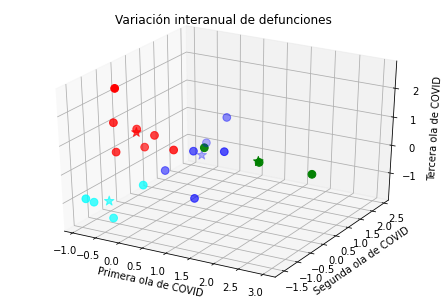

In [37]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
centroids = modelo.cluster_centers_
labels = modelo.predict(resultado_escalado)
C = modelo.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Variación interanual de defunciones')
ax.set_xlabel('Primera ola de COVID')
ax.set_ylabel('Segunda ola de COVID')
ax.set_zlabel('Tercera ola de COVID')
ax.scatter(resultado_escalado[:, 0], resultado_escalado[:, 1], resultado_escalado[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)